In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, binom, poisson, geom, expon
from math import sqrt

from scipy.stats import ttest_ind,f_oneway,chisquare,chi2_contingency,kruskal


In [2]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
data=pd.read_csv("scaler_apollo_hospitals.csv")

In [4]:
data.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [5]:
#removing the index column, since pandas loaded dataframe has default index column

data.drop(columns='Unnamed: 0',inplace=True)
data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


### Define Problem Statement and perform Exploratory Data Analysis
1.	Definition of problem (as per given problem statement with additional views)
2.	Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (if required), missing value detection, statistical summary.
3.	Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
4.	Bivariate Analysis (Relationships between important variables such as hospitalization charges with region, smoker, viral load etc)
5.	Illustrate the insights based on EDA
    - Comments on range of attributes, outliers of various attributes
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plots


Problem Statement :
> We need to generate meaningful and actionable insights from Patient-level collected data, which will help the hospital to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.

> Bring out information like, Which variables are significant in predicting the reason for hospitalization for different regions

> To know, how well some variables like viral load, smoking, Severity Level describe the hospitalization charges

In [6]:
data.shape

(1338, 7)

> The dataset has 7 columns/attributes and have total of 10886 number of records, which is considerably low and population data can be used for all the analysis.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


> From above code, we can observe that data type is correctly labelled. Also, there is no null data in the provided dataset.
> Also, in the provided data, there is no need to explicity convert categorical to numerical data as all required data are in integer or float format.

In [8]:
data.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [9]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

> The data for southest region has relatively more records and all other regions have almost same records.

In [10]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

> The count of male and female patient records are almost the same.

In [11]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

> Non-smoker people record count is significantly higher than than of the smoker person.

In [12]:
data['severity level'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

> More the severity of the illness, lesser is the number of patients in the dataset.

In [13]:
# We can convert the categorical variables into the numerical form to create better correction analysis.

data2=data.copy()
data2

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,male,no,northwest,10.32,3,26501
1334,18,female,no,northeast,10.64,0,5515
1335,18,female,no,southeast,12.28,0,4075
1336,21,female,no,southwest,8.60,0,5020


In [14]:
data2['sex']=[1 if x=='female' else 0 for x in data2['sex']]
data2['smoker']=[1 if x=='yes' else 0 for x in data2['smoker']]
data2

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,1,1,southwest,9.30,0,42212
1,18,0,0,southeast,11.26,1,4314
2,28,0,0,southeast,11.00,3,11124
3,33,0,0,northwest,7.57,0,54961
4,32,0,0,northwest,9.63,0,9667
...,...,...,...,...,...,...,...
1333,50,0,0,northwest,10.32,3,26501
1334,18,1,0,northeast,10.64,0,5515
1335,18,1,0,southeast,12.28,0,4075
1336,21,1,0,southwest,8.60,0,5020


In [15]:
data2.corr()

,age,sex,smoker,viral load,severity level,hospitalization charges
age,1.000000,0.020856,-0.025019,0.109300,0.042469,0.299008
sex,0.020856,1.000000,-0.076185,-0.046343,-0.017163,-0.057292
smoker,-0.025019,-0.076185,1.000000,0.003739,0.007673,0.787251
viral load,0.109300,-0.046343,0.003739,1.000000,0.012729,0.198388
severity level,0.042469,-0.017163,0.007673,0.012729,1.000000,0.067998
hospitalization charges,0.299008,-0.057292,0.787251,0.198388,0.067998,1.000000


> Hospitalization charges looks less correlated to all factors except smoking.
> Smokers are tend to have more hospitalization charges.

<AxesSubplot:xlabel='hospitalization charges', ylabel='Count'>

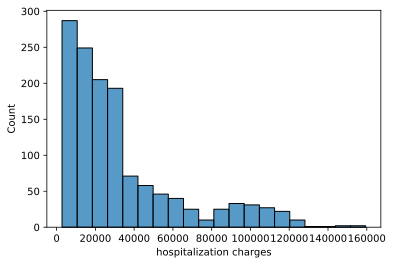

In [16]:
sns.histplot(data['hospitalization charges'],bins=20)

> For the most of the patients, hospitalization charge is less than 40k.

C:\Users\amank\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hospitalization charges'>

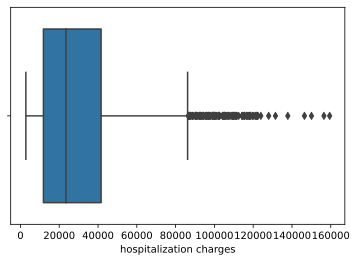

In [17]:
sns.boxplot(data['hospitalization charges'])

> The mean hospitalization charges seems to be around 22k and max upto 90k and then we have many outliers as well, whose charges go beyond the max limit.

<AxesSubplot:xlabel='age', ylabel='Count'>

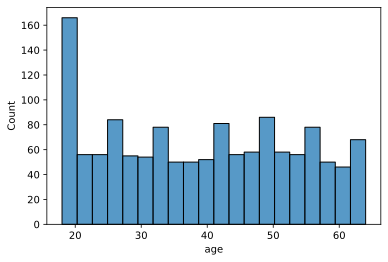

In [18]:
sns.histplot(data['age'],bins=20)

> The number of patients of age less than 20 are higher as compared to other age ranges, and all other aged patients count is simliar.

<AxesSubplot:xlabel='viral load', ylabel='Count'>

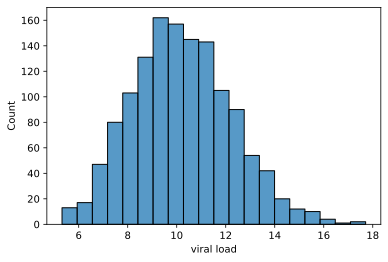

In [19]:
sns.histplot(data['viral load'],bins=20)

> The viral load seems to be following gaussian distributed. Most of the patients viral load is centrally located, similar to the mean value.

<AxesSubplot:xlabel='severity level', ylabel='hospitalization charges'>

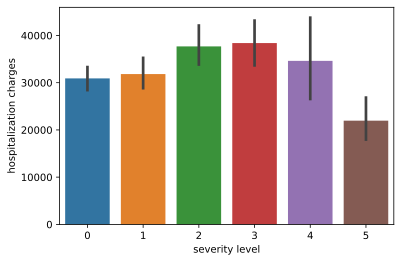

In [20]:
sns.barplot(data=data,x='severity level',y='hospitalization charges')

> Hospitalization charges seems to be going higher with high severity level, except for the most severe level 5, whose hospitalization charges seems the least. That maybe because of insurance or some finacial support provided to them.

<AxesSubplot:xlabel='region', ylabel='hospitalization charges'>

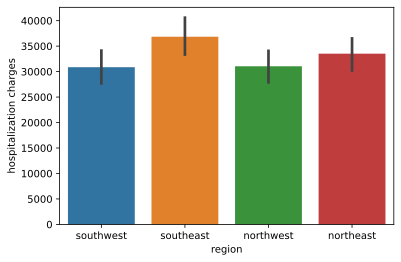

In [21]:
sns.barplot(data=data,x='region',y='hospitalization charges')

> Hospitalization charges isn't much impacted based on the region. There are slight differences but doesn't look significant.

<AxesSubplot:xlabel='severity level', ylabel='hospitalization charges'>

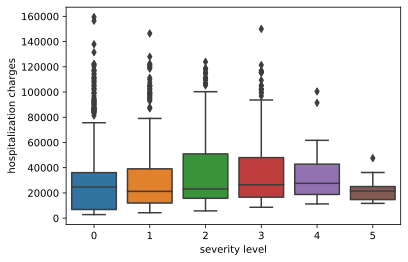

In [22]:
sns.boxplot(data=data,x='severity level',y='hospitalization charges')

> We can see through boxplot as well, that the mean value of hospitalization charges for different severity level are very similar. However, the max charges vary a lot, because of different distribution.

<AxesSubplot:xlabel='age', ylabel='hospitalization charges'>

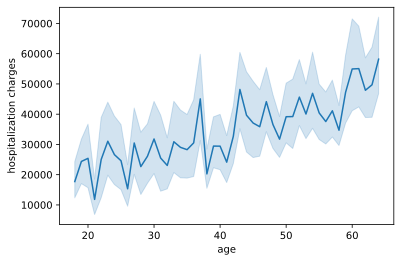

In [23]:
sns.lineplot(data=data,x='age',y='hospitalization charges')

> Hopitalization charges seems to be increasing with increase in age of the patients.

###	Missing values treatment & Outlier treatment 

In [24]:
pd.isnull(data).sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

> There is no missing value in the dataset.

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

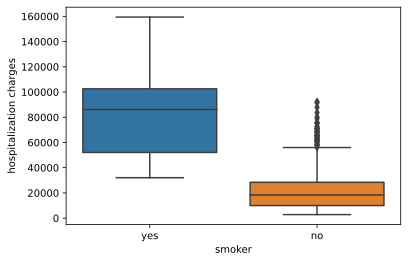

In [25]:
sns.boxplot(data=data,x='smoker',y='hospitalization charges')

> As we can see in the above chart, non-smoker hospitalization charge mean value is around 20k and max value is around 60k. However, there are many outliers with hospitalization charges above 60k.

> We can find the upper and lower limit through IQR calculation.

In [26]:
data_nonsmoker=data.loc[data['smoker']=='no']['hospitalization charges']
q1 = np.percentile(data_nonsmoker, 25)
q3 = np.percentile(data_nonsmoker, 75)

iqr = q3 - q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

lower_limit,upper_limit

(-17695.25, 56068.75)

> Although the lower limit is in negative and hospitalization charge can't be negative, so the min charge we can consider is 0 and max charge to be 56070. Others can be outliers and can be ignored for decision making.

## 	Hypothesis Testing 

### 1.	Prove (or disprove) that the hospitalization charges of people who do smoking are greater than those who don't? 

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

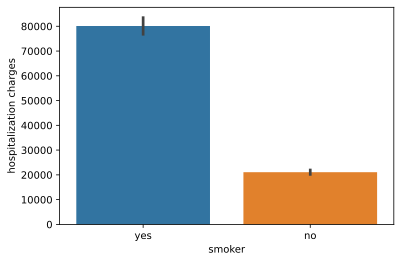

In [27]:
sns.barplot(data=data,x='smoker',y='hospitalization charges')

> From the graph, we can say that the hospitalization charges are much higher for smokers than the non-smokers. Let us now prove it based on hypothesis testing. 

In [28]:
data_smoker=data.loc[data['smoker']=='yes']['hospitalization charges']
data_nonsmoker=data.loc[data['smoker']=='no']['hospitalization charges']

In [29]:
# let us assume hospital charges for smoker be c1 and that that of non-smoker be c0

#Hypothesis can be formulated as, 
# H0 : c1 <= c0
# H1 : c1 > c0

# Test : T-test

# Test type : Right-tailed T-test

# Before that, let us test the assumptions for this test.

# Below are the assumptions to be tested :
# 1. No significant outliers in the data
# 2. Data should be normally distributed
# 3. the variances of the two groups should not be significantly different

<AxesSubplot:xlabel='smoker', ylabel='hospitalization charges'>

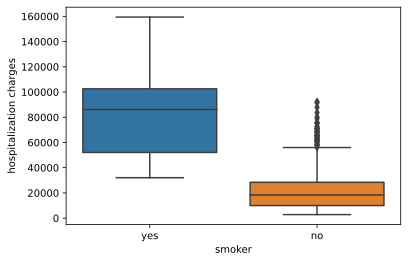

In [30]:
sns.boxplot(data=data,x='smoker',y='hospitalization charges')

In [31]:
from scipy.stats import shapiro
stat, p1 = shapiro(data_smoker)
if p1 > 0.05:
 print('smoker data Probably Gaussian')
else:
 print('smoker data Probably not Gaussian')

stat, p1 = shapiro(data_nonsmoker)
if p1 > 0.05:
 print('Non-smoker data Probably Gaussian')
else:
 print('Non-smoker data Probably not Gaussian')


smoker data Probably not Gaussian
Non-smoker data Probably not Gaussian


In [32]:
data_smoker.var(), data_nonsmoker.var()

(832547033.7254223, 224533906.64452934)

In [33]:
# Although assumptions have failed still we continue with out testing

# Next step will be computing p-value, and assuming alpha = 0.05 for confidence level 95%

In [34]:
d1=data_smoker
d2=data_nonsmoker

alpha = 0.05
test_stat,p_value=ttest_ind(d1, d2, alternative="greater")
print("test-stat: ", test_stat)
print("p-value: ", p_value)

if p_value < alpha:
    print("Null rejected")
    
else:
    print("Failed to reject Null hypothesis")

test-stat:  46.66489219013773
p-value:  4.1378462637459944e-283
Null rejected


> Since null hypothesis is rejected. So, we can conclude that hospitalization charges for smokers is higher than that of the non-smokers.

### 2. Prove (or disprove) with statistical evidence that the viral load of females is different from that of males 

<AxesSubplot:xlabel='sex', ylabel='viral load'>

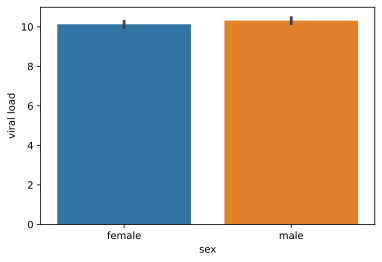

In [35]:
sns.barplot(data=data,x='sex',y='viral load')

> From the graph, we cannot much say that there is significant difference between male and female for viral load. Let us now find it based on hypothesis testing.

In [36]:
data_male_vl=data.loc[data['sex']=='male']['viral load']
data_female_vl=data.loc[data['sex']=='female']['viral load']

In [37]:
# let us assume viral load for male be v1 and that that of female be v0

#Hypothesis can be formulated as, 
# H0 : v1 = v0
# H1 : v1 != v0

# Test : T-test

# Test type : Two-tailed T-test

# Before that, let us test the assumptions for this test.

# Below are the assumptions to be tested :
# 1. No significant outliers in the data
# 2. Data should be normally distributed
# 3. the variances of the two groups should not be significantly different.

<AxesSubplot:xlabel='sex', ylabel='viral load'>

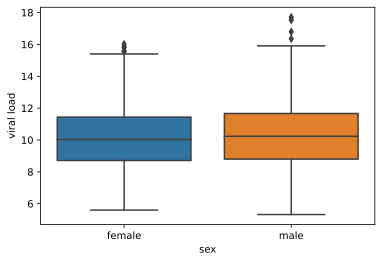

In [38]:
sns.boxplot(data=data,x='sex',y='viral load')

In [39]:
from scipy.stats import shapiro
stat, p1 = shapiro(data_male_vl)
if p1 > 0.05:
 print('male viral load data Probably Gaussian')
else:
 print('male viral load data Probably not Gaussian')

stat, p1 = shapiro(data_female_vl)
if p1 > 0.05:
 print('female viral load data Probably Gaussian')
else:
 print('female viral load data Probably not Gaussian')


male viral load data Probably not Gaussian
female viral load data Probably not Gaussian


In [40]:
data_male_vl.var(),data_female_vl.var()

(4.189755370370368, 4.061844158123501)

In [41]:
# Next step will be computing p-value, and assuming alpha = 0.05 for confidence level 95%

In [42]:
d1=data_male_vl
d2=data_female_vl

alpha = 0.05
test_stat,p_value=ttest_ind(d1, d2)
print("test-stat: ", test_stat)
print("p-value: ", p_value)

if p_value < alpha:
    print("Null rejected")
    
else:
    print("Failed to reject Null hypothesis")

test-stat:  1.695711164450323
p-value:  0.0901735841670204
Failed to reject Null hypothesis


> Since we fail to reject the null hypothesis, so we can conclude that the viral load for both male and female are same.

### 3. Is the proportion of smoking significantly different across different regions? 

<AxesSubplot:xlabel='region', ylabel='count'>

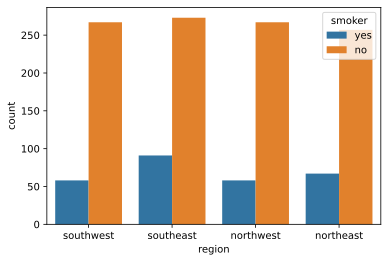

In [43]:
sns.countplot(data=data,x='region',hue='smoker')

> From the graph, we cannot much say that there is significant difference in the proportion of smokers and non-smokers for different regions. Let us now find it based on hypothesis testing.

In [44]:
#Hypothesis can be formulated as, 
# H0 : proportion of smoker and non-smoker across different regions are same
# H1 : proportion of smoker and non-smoker across different regions are different

# Test : Chi-square test

# Before that, let us test the assumptions for this test.

# Below are the assumptions to be tested :
# 1. both variables should be categorical
# 2. all observations are independent
# 3. contingency table are mutually exclusive
# 4. Expected value of cells should be 5 or greater in at least 80% of cells.

In [45]:
# smoker and regions are categorical and independent data. -> assumptions met.

In [46]:
observed=pd.crosstab(data['region'],data['smoker'])
observed

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [47]:
# Next step will be computing p-value, and assuming alpha = 0.05 for confidence level 95%

In [48]:
alpha = 0.05
chi_test,p_value,df,exp_freq=chi2_contingency(observed)
print("chi_test: ", chi_test)
print("p-value: ", p_value)

if p_value < alpha:
    print("Null rejected")
    
else:
    print("Failed to reject Null hypothesis")

chi_test:  7.343477761407071
p-value:  0.06171954839170541
Failed to reject Null hypothesis


> Since we fail to reject the null hypothesis, so we can conclude that the smoker to non-smoker proportion for different regions are same.

### 4. Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence 

<AxesSubplot:xlabel='severity level', ylabel='viral load'>

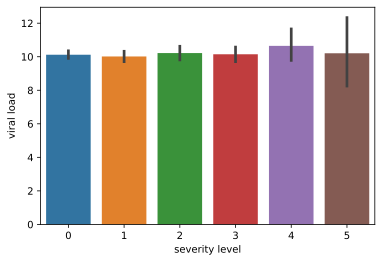

In [49]:
data_women=data.loc[data['sex']=='female']
sns.barplot(data=data_women,x='severity level',y='viral load')

> From the graph, we cannot much say that there is difference in the viral load mean value for different severity level, specally for 0, 1 & 2. Let us now find it based on hypothesis testing.

In [50]:
#Hypothesis can be formulated as, 
# H0 : mean viral load for women of severity level 0,1 & 2 are same
# H1 : mean viral load for women of severity level 0,1 & 2 are different

# Test : Anova

# Before that, let us test the assumptions for this test.

# Below are the assumptions to be tested :
# 1. Normality – that each sample is taken from a normally distributed population (Gaussian)
# 2. Independence - each sample is drawn independently of the other samples
# 3. Equal variance of data in different groups

C:\Users\amank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='viral load', ylabel='Density'>

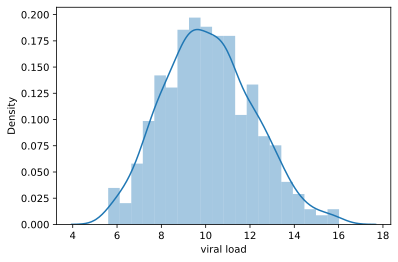

In [51]:
sns.distplot(data_women['viral load'],bins=20)

In [52]:
# Data are indenpendent.

In [53]:
m0=data.loc[(data['sex']=='female') & (data['severity level']==0)]['viral load']
m1=data.loc[(data['sex']=='female') & (data['severity level']==1)]['viral load']
m2=data.loc[(data['sex']=='female') & (data['severity level']==2)]['viral load']

In [54]:
m0.var(),m1.var(),m2.var()

(3.9564046784890454, 3.7212929130049197, 4.882715140293407)

In [55]:
# Next step will be computing p-value, and assuming alpha = 0.05 for confidence level 95%

In [56]:
alpha = 0.05
f_stat, p_value = f_oneway(m0, m1, m2)
print("F-stat: ", f_stat)
print("p-value: ", p_value)

if p_value < alpha:
    print("Null rejected")
else :
    print("Fail to reject the Null")

F-stat:  0.3355061434584082
p-value:  0.7151189650367746
Fail to reject the Null


> Since we fail to reject the null hypothesis, so we can conclude that viral load mean value for patients with severity level 0,1 & 2 are same.

### Business Insights 

- More the severity of the illness, lesser is the number of patients in the dataset.
- Hospitalization charges looks less correlated to all factors except smoking. Smokers are tend to have more hospitalization charges.
- For the most of the patients, hospitalization charge is less than 40k.
- The number of patients of age less than 20 are higher as compared to other age ranges, and all other aged patients count is simliar.
- Hospitalization charges seems to be going higher with high severity level, except for the most severe level 5, whose hospitalization charges seems the least. That maybe because of insurance or some finacial support provided to them.
- The mean value of hospitalization charges for different severity level are very similar. However, the max charges vary a lot, because of different distribution.
- Hopitalization charges seems to be increasing with increase in age of the patients.
- Hospitalization charges for smokers is higher than that of the non-smokers.
- The viral load for both male and female are same.
- The smoker to non-smoker proportion for different regions are same.
- Viral load mean value for patients with severity level 0,1 & 2 are same. 

### Recommendations

- Arrangement of hospitlization, doctors, medicines, beds, etc should can be based on the severity level of patients and lesser the severity, more should be the arrangements.
- Insurance charages for smokers can be increased in order to provide support during hospital admission, due to higher hospital charges requirements.
- Bring down hospitalization charges for higher severity level patients by introducing better health insurance plan and providing other financial support in form of payment methods and duration to pay.
- Introduce methods like insurance and financial guidance to reduce the hospital charges for higher aged patients.
- Not to consider viral load as differentiator among gender.
- Even arrangements for all sex, smoker or non-smoker for different regions.
- Bring out more awareness programs to reduce the smokers as it impacts the hospital load as well as hospitalization charges.